In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from making_plots import (plot_season_pie, plot_season_trend, hosting_times_bar)
from calcs_formula import (hosting_times)

%matplotlib inline

# Load Raw Data

In [2]:
medal_standing_data = pd.read_excel("manipulated_data\medal_standings_manipulated.xlsx", sheet_name="Data")
medal_standing_data = medal_standing_data.sort_values(by="games_year")
medal_standing_data.head()

,games_code,games_year,games_city,games_country,games_continent,games_start,games_end,games_season,npc,npc_new,npc_name,rank_type,npc_rank,npc_gold,npc_silver,npc_bronze,sport_code,sport
1545,PG1960,1960,Rome,Italy,Europe,18 September,25 September,Summer,GER,GER,Germany,Sport,2.0,5,3,5,AT,Athletics
1541,PG1960,1960,Rome,Italy,Europe,18 September,25 September,Summer,IRL,IRL,Ireland,Sport,6.0,1,0,0,AR,Archery
1540,PG1960,1960,Rome,Italy,Europe,18 September,25 September,Summer,AUS,AUS,Australia,Sport,5.0,1,1,0,AR,Archery
1539,PG1960,1960,Rome,Italy,Europe,18 September,25 September,Summer,FRA,FRA,France,Sport,4.0,1,2,0,AR,Archery
1538,PG1960,1960,Rome,Italy,Europe,18 September,25 September,Summer,GBR,GBR,United Kingdom,Sport,3.0,1,4,5,AR,Archery


In [3]:
medal_standing_dict = pd.read_excel(
    "raw_data\medal_standings.xlsx", sheet_name="Data Dictionary", header = None, names = ["column_name", "explanation"]
)
medal_standing_dict

,column_name,explanation
0,games_code,The year and type of games. For years with bot...
1,games_year,The year the games were held
2,games_city,Host city
3,games_country,Host country
4,games_continent,Continent of host country
5,games_start,Date the games started
6,games_end,Date the games ended
7,games_season,Summer or winter games
8,npc,"Country code (IOC code) original to the data, ..."
9,npc_new,Copy of npc but codes have been updated to ref...


# EDA

In [4]:
medal_standing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2346 entries, 1545 to 993
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   games_code       2346 non-null   object 
 1   games_year       2346 non-null   int64  
 2   games_city       2346 non-null   object 
 3   games_country    2346 non-null   object 
 4   games_continent  2346 non-null   object 
 5   games_start      2346 non-null   object 
 6   games_end        2346 non-null   object 
 7   games_season     2346 non-null   object 
 8   npc              2346 non-null   object 
 9   npc_new          2346 non-null   object 
 10  npc_name         2338 non-null   object 
 11  rank_type        2346 non-null   object 
 12  npc_rank         2056 non-null   float64
 13  npc_gold         2346 non-null   int64  
 14  npc_silver       2346 non-null   int64  
 15  npc_bronze       2346 non-null   int64  
 16  sport_code       2077 non-null   object 
 17  sport            

In [5]:
medal_standing_data.isna().sum()

games_code           0
games_year           0
games_city           0
games_country        0
games_continent      0
games_start          0
games_end            0
games_season         0
npc                  0
npc_new              0
npc_name             8
rank_type            0
npc_rank           290
npc_gold             0
npc_silver           0
npc_bronze           0
sport_code         269
sport              269
dtype: int64

**Number of Medals Per Year**

In [6]:
medals_per_year = medal_standing_data.groupby("games_year").agg({
    "npc_gold": lambda x: x.sum(),
    "npc_silver": lambda x: x.sum(),
    "npc_bronze": lambda x: x.sum()
    }).reset_index()
medals_per_year["total"] = medals_per_year["npc_gold"] + medals_per_year["npc_silver"] + medals_per_year["npc_bronze"]
#medals_per_year.sort_values(ascending=False, by="total")
medals_per_year

,games_year,npc_gold,npc_silver,npc_bronze,total
0,1960,216,176,158,550
1,1964,277,262,245,784
2,1968,343,299,304,946
3,1972,308,270,293,871
4,1976,801,631,569,2001
5,1980,1091,847,740,2678
6,1984,1766,1590,1406,4762
7,1988,1248,1153,1073,3474
8,1992,897,815,796,2508
9,1994,256,218,193,667


In [7]:
medal_standing_data[["npc_gold", "npc_silver", "npc_bronze"]].describe()

,npc_gold,npc_silver,npc_bronze
count,2346.000000,2346.000000,2346.000000
mean,5.279199,4.627877,4.367860
std,11.060410,9.796177,9.192876
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,5.000000,4.000000,4.000000
max,137.000000,131.000000,129.000000


In [8]:
medals_per_year[
    [
        "npc_gold",
        "npc_silver",
        "npc_bronze",
    ]
].sum()

npc_gold      12385
npc_silver    10857
npc_bronze    10247
dtype: int64

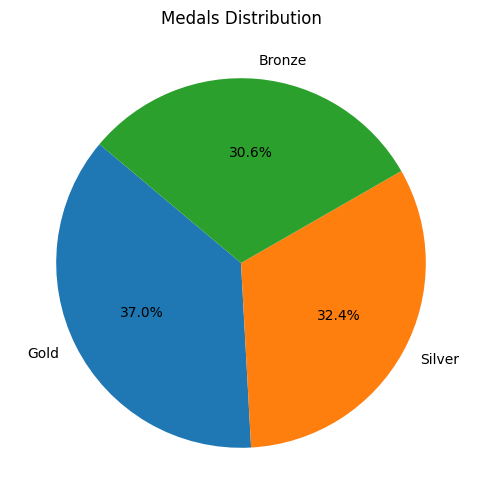

In [9]:
medals = ["Gold", "Silver", "Bronze"]
total_medals = [12385, 10857, 10247]

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(total_medals, labels=medals, autopct="%1.1f%%", startangle=140)
plt.title("Medals Distribution")
plt.show()

* In total ***there are more gold medals*** which have been won followed by silver and then bronze

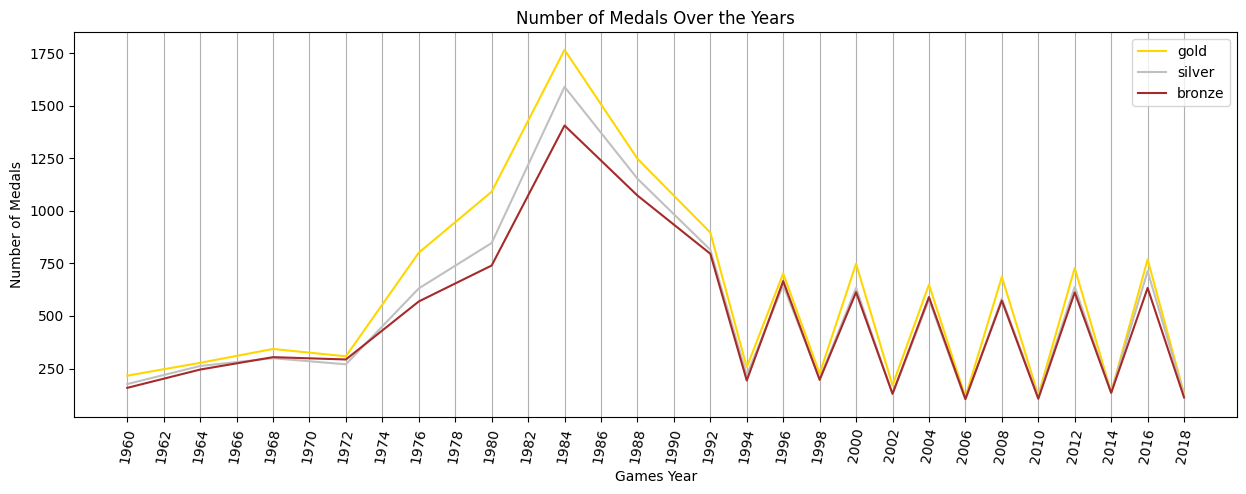

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(data=medals_per_year, x="games_year", y="npc_gold", label = "gold", color = "gold")
sns.lineplot(data=medals_per_year, x="games_year", y="npc_silver", label="silver", color = "silver")
sns.lineplot(data=medals_per_year, x="games_year", y="npc_bronze", label="bronze", color = "brown")
ax.xaxis.grid()
plt.xticks(
    np.arange(
        medals_per_year["games_year"].min(),
        medals_per_year["games_year"].max() + 1,
        2.0,
    )
)
plt.xticks(rotation=80)
ax.set(
    xlabel="Games Year",
    ylabel="Number of Medals",
    title="Number of Medals Over the Years",
)
plt.legend()
plt.show()

* In 1984 was when the most of the medals were won. A total of 4762
* In 2006 was when the least number of medals won. A total of 320.
* In all the years the number of gold medals won is always highest compared to other medals
* From 1994, the pattern of medals won follows a zig-zag or alternate pattern (low -> high -> low -> high, repeat)
* Prior to 1992, paralympics used to occur in 4 years interval. From 1994 onwards the period has reduced to 2 years

**Compare Summer vs Winter Medals Tally**

In [11]:
medals_per_season =  medal_standing_data.groupby(["games_year", "games_season"]).agg(
    {
        "npc_gold": lambda x: x.sum(),
        "npc_silver": lambda x: x.sum(),
        "npc_bronze": lambda x: x.sum(),
    }
).reset_index(names=["games_year","games_season"])

medals_per_season["total_medals"] = medals_per_season["npc_gold"] + medals_per_season["npc_silver"] + medals_per_season["npc_bronze"]
medals_per_season

,games_year,games_season,npc_gold,npc_silver,npc_bronze,total_medals
0,1960,Summer,216,176,158,550
1,1964,Summer,277,262,245,784
2,1968,Summer,343,299,304,946
3,1972,Summer,308,270,293,871
4,1976,Summer,695,539,485,1719
5,1976,Winter,106,92,84,282
6,1980,Summer,963,737,636,2336
7,1980,Winter,128,110,104,342
8,1984,Summer,1553,1385,1213,4151
9,1984,Winter,213,205,193,611


Summer: 28149 
Winter: 5340


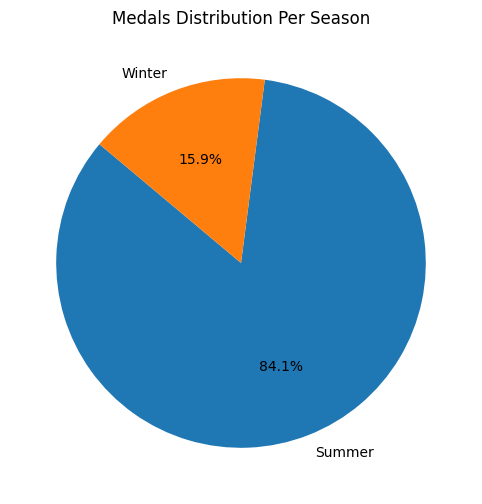

In [12]:
plot_season_pie(medals_per_season, "total_medals", "Medals Distribution Per Season")

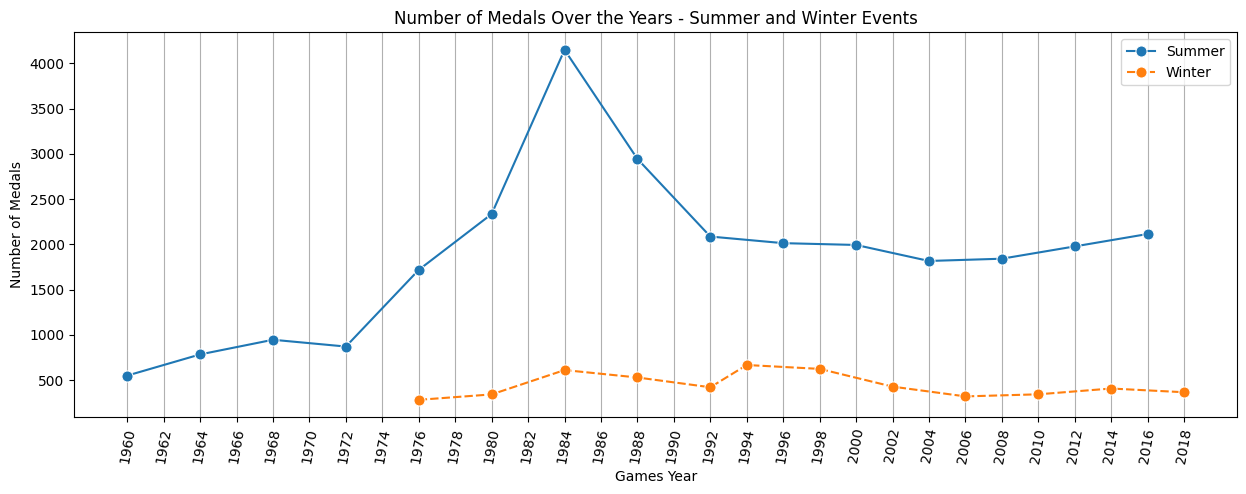

In [13]:
plot_season_trend(medals_per_season,"total_medals", "Medals")

* In total, there are 28 149 (84.1%) and  5 340 (15.9%) medals won in summer and winter events, respectively.
* Paralympics were initially held in summer only until 1976 where the first paralympic were was held
* Between 1976 and 1992, summer and winter paralympics events were held in the same year (i.e. in one year there were summer and winter paralympics games)
* The events held in summer always have more medals won compared to winter events
* From 1994, winter and summer events alternate (e.g. Winter event in 1994 and summer event in 1996 and repeat). Therefore the zig-zag pattern observed in the plot above is explained by this alternating pattern.
* Thus the pattern of four years has remained over the time. Summer events are 4 years and winter events are 4 years as well between each other.

**Number of Countries Participating?**

In [14]:
countries_per_season = medal_standing_data.groupby(["games_year", "games_season"]).agg({
            "npc_new": lambda x: x.count(),
        }
    ).reset_index(names=["games_year", "games_season"])
countries_per_season

,games_year,games_season,npc_new
0,1960,Summer,58
1,1964,Summer,74
2,1968,Summer,83
3,1972,Summer,88
4,1976,Summer,102
5,1976,Winter,22
6,1980,Summer,109
7,1980,Winter,29
8,1984,Summer,137
9,1984,Winter,34


Summer: 1875 
Winter: 471


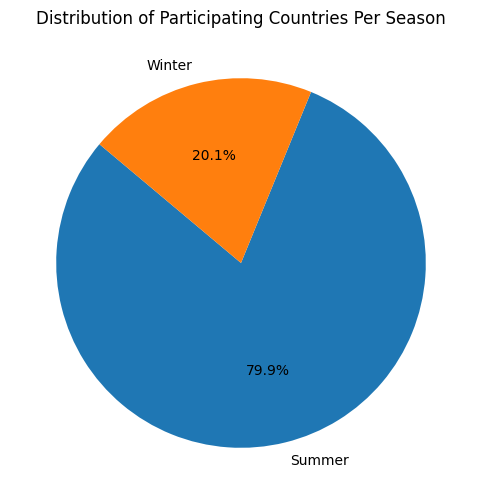

In [15]:
plot_season_pie(
    countries_per_season,
    "npc_new",
    "Distribution of Participating Countries Per Season",
)

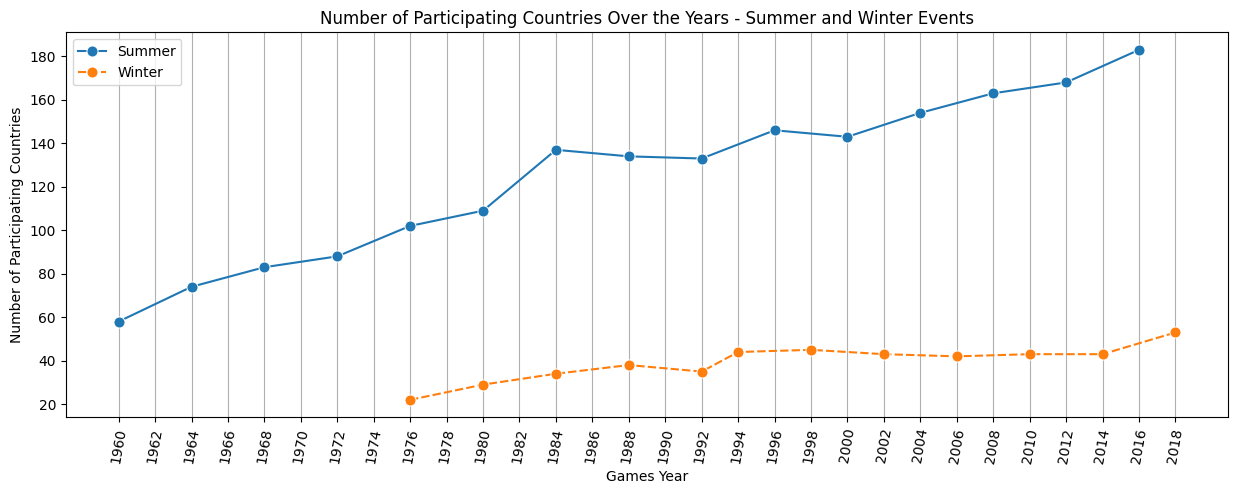

In [16]:
plot_season_trend(countries_per_season, "npc_new", "Participating Countries")

* The number of participating countries in winter are fewer compared to those who participate in summer.
* The number of participating countried during both winter and summer events have been increasing over the years. However the number of countries participating in winter events remained relatively the same between 1994 and 2014

In [17]:
countries_per_season.groupby("games_season")["npc_new"].describe()

,count,mean,std,min,25%,50%,75%,max
games_season,,,,,,,,
Summer,15.0,125.00,37.378374,58.0,95.00,134.0,150.00,183.0
Winter,12.0,39.25,8.225515,22.0,34.75,42.5,43.25,53.0


* A total of 15 summer events were held while only 12 winter events were held with the latest one being a winter event.
* An average of 125 countries participate in summer eevents while an average of 39 countries participate in winter events
* A minimum of 58 countries participated in one summer event while a minimum of 22 countries participated in winter events. Both of this events were at the very beginning of both summer and winter events.
* A maximum of 150 countries participated in summer events and 53 participated in winter events. Both maximum number of participating countries occured in the last year of the dataset.

**Number of Uniques Sports per Season**

In [18]:
sports_per_season = medal_standing_data.groupby(["games_year", "games_season"]).agg({
            "sport":pd.Series.nunique,
        }).reset_index(names=["games_year", "games_season"])

sports_per_season

,games_year,games_season,sport
0,1960,Summer,8
1,1964,Summer,9
2,1968,Summer,10
3,1972,Summer,10
4,1976,Summer,13
5,1976,Winter,2
6,1980,Summer,13
7,1980,Winter,3
8,1984,Summer,18
9,1984,Winter,3


In [19]:
sports_per_season.groupby("games_season")["sport"].describe()

,count,mean,std,min,25%,50%,75%,max
games_season,,,,,,,,
Summer,15.0,15.400000,4.548155,8.0,11.5,17.0,19.0,22.0
Winter,12.0,4.166667,1.193416,2.0,3.0,4.5,5.0,6.0


Summer: 231 
Winter: 50


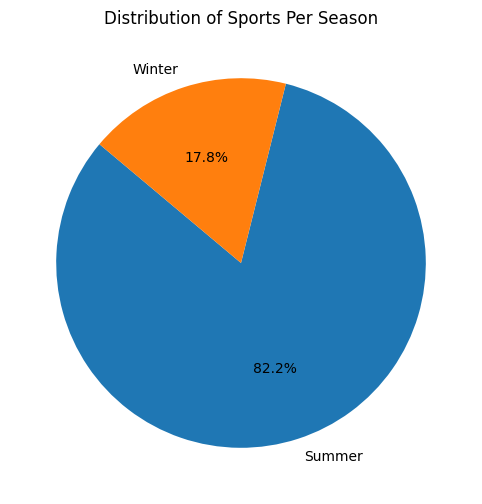

In [20]:
plot_season_pie(sports_per_season, "sport", "Distribution of Sports Per Season")

* An average of 15 and 4 different sports are played in summer and winter paralympics events, respectively.
* More sporting events occur in summer than in winter
* Only a maximum of 6 different sports are played in winter which is lower than a maximum of 22 sports played in summer.

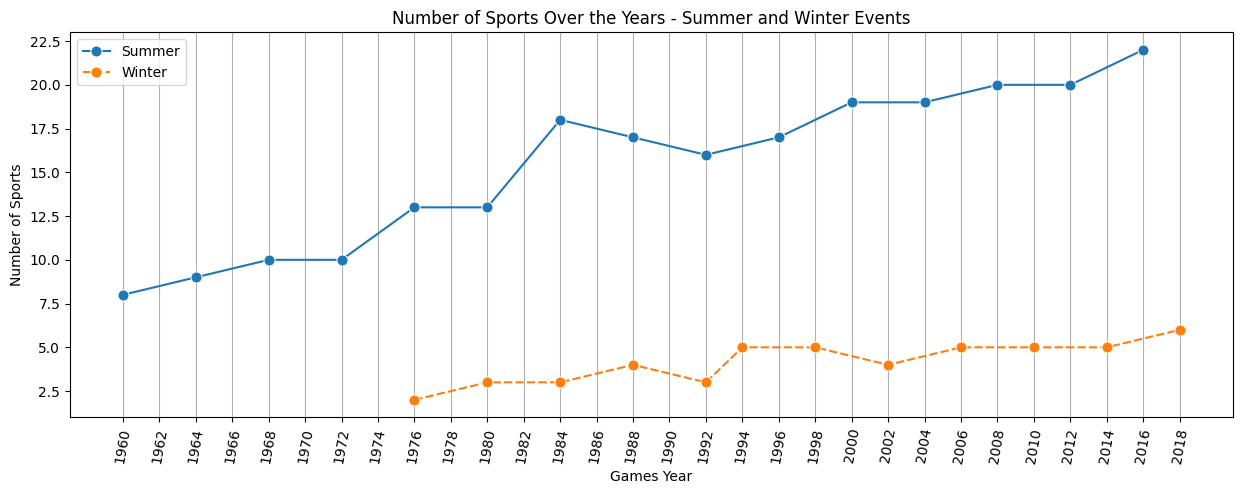

In [21]:
plot_season_trend(sports_per_season, "sport", "Sports")

* The number of sports played in both winter and summer events have increased over the years.
* There are fewer sports played and contries participating in winter events compared to summer.
* Therefore there are fewer opportunities to collect medals in winter compared to summer hence there are differences in medals collected in both events

**Are there winter only sports vs summer only sports?**

In [22]:
summer_sports = medal_standing_data[medal_standing_data["games_season"] == "Summer"][
    "sport"
].unique()

summer_sports

array(['Athletics', 'Archery', nan, 'Table Tennis',
       'Wheelchair Basketball', 'Wheelchair Fencing', 'Swimming',
       'Snooker', 'Dartchery', 'Weightlifting', 'Lawn Bowls', 'Shooting',
       'Goalball', 'Volleyball', 'Wrestling', 'Powerlifting',
       'Football 7-a-side', 'Equestrian', 'Boccia', 'Cycling', 'Judo',
       'Wheelchair Tennis', 'Sailing', 'Wheelchair Rugby',
       'Basketball ID', 'Football 5-a-side', 'Rowing', 'Canoe',
       'Triathlon'], dtype=object)

In [23]:
winter_sports = medal_standing_data[medal_standing_data["games_season"] == "Winter"][
    "sport"
].unique()

winter_sports

array(['Alpine Skiing', 'Cross-Country', nan, 'Ice Sledge Speed Skating',
       'Biathlon', 'Para Ice Hockey', 'Wheelchair Curling', 'Snowboard'],
      dtype=object)

In [24]:
len(summer_sports), len(winter_sports)

(29, 8)

In [25]:
for sport in winter_sports:
    if sport in summer_sports:
        print(sport)

In [26]:
for sport in summer_sports:
    if sport in winter_sports:
        print(sport)

* Summer Sports: 'Athletics', 'Archery', 'Table Tennis', 'Wheelchair Basketball', 'Wheelchair Fencing', 'Swimming', 'Snooker', 'Dartchery', 'Weightlifting', 'Lawn Bowls', 'Shooting', 'Goalball', 'Volleyball', 'Wrestling', 'Powerlifting', 'Football 7-a-side', 'Equestrian', 'Boccia', 'Cycling', 'Judo', 'Wheelchair Tennis', 'Sailing', 'Wheelchair Rugby', 'Basketball ID', 'Football 5-a-side', 'Rowing', 'Canoe' and 'Triathlon'
* Winter Sports: 'Alpine Skiing', 'Cross-Country', 'Ice Sledge Speed Skating', 'Biathlon', 'Para Ice Hockey', 'Wheelchair Curling', 'Snowboard'
* There are 28 and 7 different summers and winter sports, respectively.
* No sport played in winter are played in summer and vice versa

# Dominant Countries

In [27]:
medals_per_country = (medal_standing_data.groupby(["npc_new", "games_season"]).agg({
            "npc_gold": lambda x: x.sum(),
            "npc_silver": lambda x: x.sum(),
            "npc_bronze": lambda x: x.sum(),
        })
    .reset_index())

medals_per_country["total_medals"] = (
                medals_per_country["npc_gold"]
                + medals_per_country["npc_silver"]
                + medals_per_country["npc_bronze"]
            )
medals_per_country

,npc_new,games_season,npc_gold,npc_silver,npc_bronze,total_medals
0,ALG,Summer,3,0,1,4
1,ARG,Summer,36,56,56,148
2,AUS,Summer,681,686,638,2005
3,AUS,Winter,20,8,12,40
4,AUT,Summer,101,80,90,271
...,...,...,...,...,...,...
95,USA,Winter,221,238,167,626
96,UZB,Summer,3,1,6,10
97,VEN,Summer,1,0,1,2
98,VIE,Summer,1,0,1,2


In [28]:
len(medal_standing_data["npc_new"].unique())

73

In [29]:
# number of times a country has participated in paralympic events (Winter or Summer)
# games_year represent the number of times the country participated in a certain event
n_participation_per_country = medal_standing_data.groupby(["npc_name","games_season"]).agg({
    "games_year": pd.Series.nunique
}
    ).reset_index()
n_participation_per_country = n_participation_per_country.sort_values(by="games_year", ascending=False)
n_participation_per_country.head(10)

,npc_name,games_season,games_year
91,United States,Summer,15
40,Italy,Summer,15
2,Australia,Summer,15
55,Netherlands,Summer,15
4,Austria,Summer,15
29,Germany,Summer,15
26,France,Summer,15
89,United Kingdom,Summer,15
39,Israel,Summer,15
9,Belgium,Summer,14


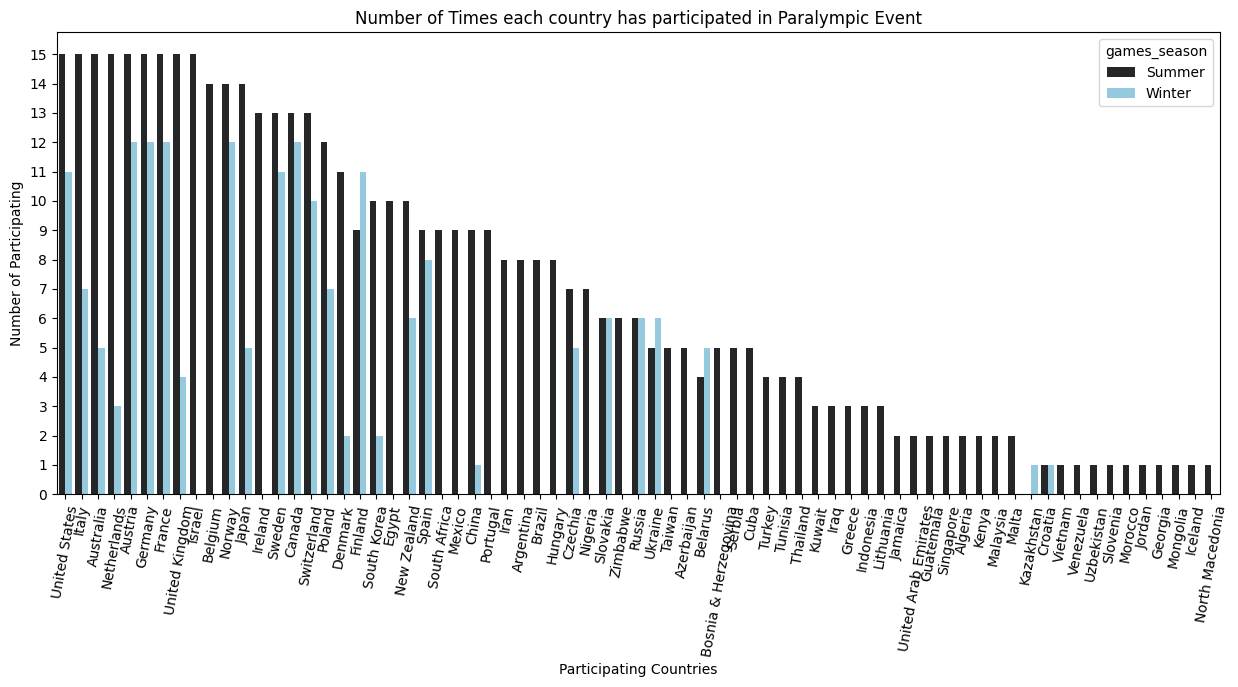

In [30]:
plt.figure(figsize=(15,6))
sns.barplot(
    data=n_participation_per_country,
    x="npc_name",
    y="games_year",
    palette="dark:skyblue",
    hue="games_season",
)
plt.xticks(rotation = 80)
plt.yticks(np.arange(0,16,1.0,))
plt.xlabel("Participating Countries")
plt.ylabel("Number of Participating")
plt.title("Number of Times each country has participated in Paralympic Event")
plt.show()

* There are some countries which only participate in winter or summer events and there are those who participate in both events

In [31]:
summer_participants = n_participation_per_country[n_participation_per_country["games_season"]==
                            "Summer"].sort_values(
    by="games_year", ascending=False)
summer_participants.head()

,npc_name,games_season,games_year
91,United States,Summer,15
29,Germany,Summer,15
39,Israel,Summer,15
89,United Kingdom,Summer,15
26,France,Summer,15


In [32]:
winter_participants = n_participation_per_country[
    n_participation_per_country["games_season"] == "Winter"
].sort_values(by="games_year", ascending=False)
winter_participants.head()

,npc_name,games_season,games_year
13,Canada,Winter,12
30,Germany,Winter,12
5,Austria,Winter,12
27,France,Winter,12
62,Norway,Winter,12


In [33]:
list_summer_participants = summer_participants["npc_name"].values
list_winter_participants = winter_participants["npc_name"].values

countries_winter_only_events = []
for country in list_winter_participants:
    if country not in list_summer_participants:
        countries_winter_only_events.append(country)

print(f"{len(countries_winter_only_events)} Country(ies) only participate in Winter Events: \n{countries_winter_only_events}")

countries_summer_only_events = []
for country in list_summer_participants:
    if country not in list_winter_participants:
        countries_summer_only_events.append(country)

print(f"\n{len(countries_summer_only_events)} Country(ies) only participate in Summer Events: \n{countries_summer_only_events}")

countries_both_events = []
for country in list_summer_participants:
    if country in list_winter_participants:
        countries_both_events.append(country)

print(f"\n{len(countries_both_events)} Country(ies) participate in both Summer and Winter Events: \n{countries_both_events}")

1 Country(ies) only participate in Winter Events: 
['Kazakhstan']

44 Country(ies) only participate in Summer Events: 
['Israel', 'Belgium', 'Ireland', 'Egypt', 'South Africa', 'Mexico', 'Portugal', 'Iran', 'Argentina', 'Brazil', 'Hungary', 'Nigeria', 'Zimbabwe', 'Azerbaijan', 'Bosnia & Herzegovina', 'Serbia', 'Cuba', 'Taiwan', 'Tunisia', 'Thailand', 'Turkey', 'Kuwait', 'Iraq', 'Greece', 'Indonesia', 'Lithuania', 'Algeria', 'Malta', 'Malaysia', 'Kenya', 'United Arab Emirates', 'Singapore', 'Guatemala', 'Jamaica', 'Vietnam', 'Venezuela', 'Uzbekistan', 'Slovenia', 'Morocco', 'Jordan', 'Georgia', 'Mongolia', 'Iceland', 'North Macedonia']

26 Country(ies) participate in both Summer and Winter Events: 
['United States', 'Germany', 'United Kingdom', 'France', 'Italy', 'Austria', 'Netherlands', 'Australia', 'Norway', 'Japan', 'Sweden', 'Canada', 'Switzerland', 'Poland', 'Denmark', 'South Korea', 'New Zealand', 'Spain', 'Finland', 'China', 'Czechia', 'Russia', 'Slovakia', 'Ukraine', 'Belarus',

In [34]:
winter_participants[winter_participants["npc_name"] == "Kazakhstan"]

,npc_name,games_season,games_year
46,Kazakhstan,Winter,1


* There is only 1 country (Kazakhstan) which participated in winter events only and that only happened once.
* 44 countries participated in summer events only, inlcuding my beloved country South Africa...hahaha
* 26 countries participated in both winter and summer events

**Medals from each of the three groups above: Winter only, Summer Only and Summer + Winter Participants**

In [35]:
total_medals_won = np.sum(medal_standing_data[["npc_gold", "npc_silver", "npc_bronze"]].sum().values)
total_medals_won

33489

In [36]:
medal_standing_data[medal_standing_data["npc_name"] == "Kazakhstan"]

,games_code,games_year,games_city,games_country,games_continent,games_start,games_end,games_season,npc,npc_new,npc_name,rank_type,npc_rank,npc_gold,npc_silver,npc_bronze,sport_code,sport
989,PG2018,2018,Pyeongchang,South Korea,Asia,9 March,18 March,Winter,KAZ,KAZ,Kazakhstan,Sport,8.0,1,0,0,CC,Cross-Country


* Kazakhstan have participated once in 2018 and it was a winter event and they won one medal which was Gold from Cross Country

In [37]:
summer_only_medals = medal_standing_data[medal_standing_data["npc_name"].isin(countries_summer_only_events)].groupby(["npc_name"]).agg({
    "npc_gold": lambda x: x.sum(),
    "npc_silver": lambda x: x.sum(),
    "npc_bronze": lambda x: x.sum()
}).reset_index()

summer_only_medals["total_medals"] = summer_only_medals["npc_gold"] + summer_only_medals["npc_silver"] + summer_only_medals["npc_bronze"]
summer_only_medals.head()

,npc_name,npc_gold,npc_silver,npc_bronze,total_medals
0,Algeria,3,0,1,4
1,Argentina,36,56,56,148
2,Azerbaijan,5,4,3,12
3,Belgium,51,48,40,139
4,Bosnia & Herzegovina,2,3,0,5


In [38]:
summer_only_medals["total_medals"].sum()

2233

In [39]:
100*summer_only_medals["total_medals"].sum()/total_medals_won

6.667861088715697

* There are 2 304 (6.88%) medals won by the countries which only participate in summer events

In [40]:
both_medals = medal_standing_data[medal_standing_data["npc_name"].isin(countries_both_events)].groupby(["npc_name"]).agg({
            "npc_gold": lambda x: x.sum(),
            "npc_silver": lambda x: x.sum(),
            "npc_bronze": lambda x: x.sum(),
        }).reset_index()

both_medals["total_medals"] = (
    both_medals["npc_gold"]
    + both_medals["npc_silver"]
    + both_medals["npc_bronze"]
)

both_medals.head()

,npc_name,npc_gold,npc_silver,npc_bronze,total_medals
0,Australia,701,694,650,2045
1,Austria,309,306,305,920
2,Belarus,29,19,29,77
3,Canada,849,677,727,2253
4,China,850,626,470,1946


In [41]:
both_medals["total_medals"].sum()

31133

In [42]:
100 * both_medals["total_medals"].sum() / total_medals_won

92.96485413120726

* There are 31 062 (92.75%) medals won by countries which participate in both summer and winter events.

## Check the dominant countries

**Top 10 Countries with most number of medals**

In [71]:
medals_standing = medal_standing_data.groupby(["npc_name"]).agg({
            "npc_gold": lambda x: x.sum(),
            "npc_silver": lambda x: x.sum(),
            "npc_bronze": lambda x: x.sum(),
        }).reset_index()
medals_standing["total_medals"] = medals_standing["npc_gold"] + medals_standing["npc_silver"] + medals_standing["npc_bronze"]
medals_standing["% total"] = 100 * medals_standing["total_medals"] / total_medals_won
medals_standing.sort_values(ascending=False, by="total_medals").head(10)

,npc_name,npc_gold,npc_silver,npc_bronze,total_medals,% total
66,United States,1761,1625,1561,4947,14.772015
65,United Kingdom,1243,1153,1138,3534,10.552719
19,Germany,1249,1178,1076,3503,10.460151
9,Canada,849,677,727,2253,6.727582
17,France,733,663,657,2053,6.130371
2,Australia,701,694,650,2045,6.106483
10,China,850,626,470,1946,5.810863
42,Netherlands,495,405,355,1255,3.747499
47,Poland,465,396,334,1195,3.568336
57,Sweden,432,347,292,1071,3.198065


**Bottom 10 countries with least number of medals**

In [44]:
medals_standing.sort_values(ascending=True, by="total_medals").head(10)

,npc_name,npc_gold,npc_silver,npc_bronze,total_medals,% total
45,North Macedonia,1,0,0,1,0.002986
41,Morocco,0,0,1,1,0.002986
40,Mongolia,1,0,0,1,0.002986
33,Kazakhstan,1,0,0,1,0.002986
23,Iceland,0,0,1,1,0.002986
18,Georgia,1,0,0,1,0.002986
68,Venezuela,1,0,1,2,0.005972
53,Slovenia,1,1,0,2,0.005972
69,Vietnam,1,0,1,2,0.005972
32,Jordan,0,1,1,2,0.005972


**Total Medals per country per year**

In [45]:
medals_standing_per_year = medal_standing_data.groupby(["games_year", "npc_name", "npc_new"]).agg({
            "npc_gold": lambda x: x.sum(),
            "npc_silver": lambda x: x.sum(),
            "npc_bronze": lambda x: x.sum(),
        }).reset_index()

medals_standing_per_year["total_medals"] = (
    medals_standing_per_year["npc_gold"]
    + medals_standing_per_year["npc_silver"]
    + medals_standing_per_year["npc_bronze"]
)
medals_standing_per_year.head(10)

,games_year,npc_name,npc_new,npc_gold,npc_silver,npc_bronze,total_medals
0,1960,Argentina,ARG,4,6,2,12
1,1960,Australia,AUS,6,12,2,20
2,1960,Austria,AUT,22,16,22,60
3,1960,Belgium,BEL,1,1,1,3
4,1960,France,FRA,6,6,2,14
5,1960,Germany,GER,30,12,18,60
6,1960,Ireland,IRL,1,0,0,1
7,1960,Israel,ISR,0,1,1,2
8,1960,Italy,ITA,58,56,46,160
9,1960,Malta,MLT,0,2,2,4


**Top Country per year**

In [46]:
top_country_per_year = medals_standing_per_year.groupby("games_year").apply(lambda x: x.nlargest(1, "total_medals")).reset_index(drop=True)
top_country_per_year

C:\Users\Dnemauluma\AppData\Local\Temp\ipykernel_15908\3105452960.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_country_per_year = medals_standing_per_year.groupby("games_year").apply(lambda x: x.nlargest(1, "total_medals")).reset_index(drop=True)


,games_year,npc_name,npc_new,npc_gold,npc_silver,npc_bronze,total_medals
0,1960,Italy,ITA,58,56,46,160
1,1964,United States,USA,100,82,64,246
2,1968,United States,USA,66,54,78,198
3,1972,United States,USA,33,50,53,136
4,1976,United States,USA,132,88,90,310
5,1980,United States,USA,158,134,110,402
6,1984,United States,USA,288,285,285,858
7,1988,United States,USA,195,214,186,595
8,1992,United States,USA,189,134,112,435
9,1994,Germany,GER,50,42,36,128


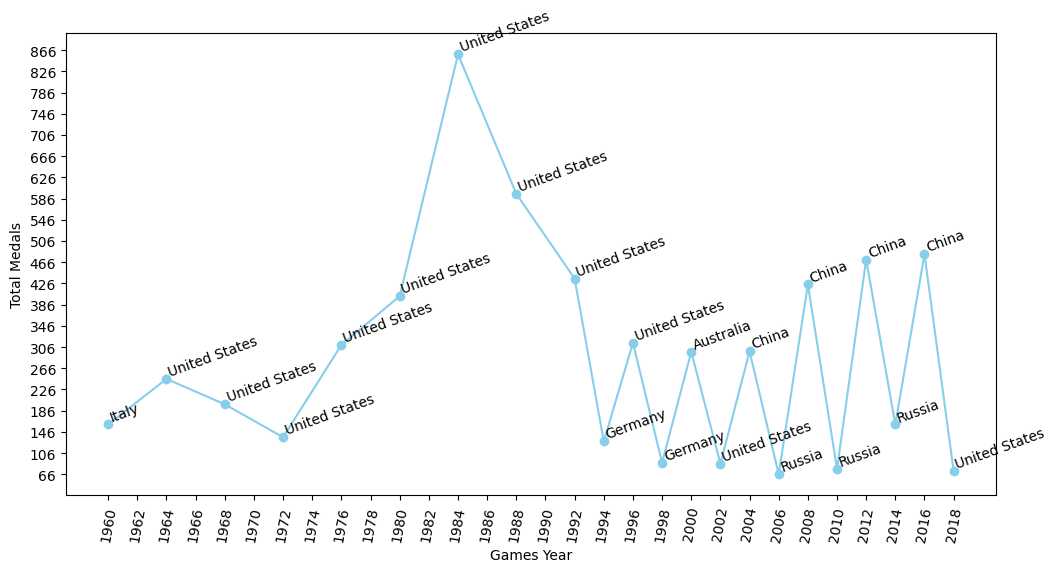

In [47]:
plt.figure(figsize=(12,6))
plt.plot(top_country_per_year["games_year"], top_country_per_year["total_medals"], marker = "o", color = "skyblue")
# Label each point with the item name
for i in range(len(top_country_per_year)):
    plt.text(
        top_country_per_year["games_year"].iloc[i],
        top_country_per_year["total_medals"].iloc[i],
        top_country_per_year["npc_name"].iloc[i],
        ha="left",
        va="bottom",
        rotation = 20
    )
plt.ylabel("Total Medals")
plt.xlabel("Games Year")
plt.xticks(np.arange(
        top_country_per_year["games_year"].min(),
        top_country_per_year["games_year"].max() + 1,
        2.0))
plt.yticks(np.arange(
        top_country_per_year["total_medals"].min(),
        top_country_per_year["total_medals"].max() + 40,
        40))
plt.xticks(rotation=80)
plt.show()

* USA have dominated the paralympic events. In 22 years of events being held, USA have come as number 1 in 11 occassions.
* Italy which dominated the first paralympic event in 1960 have never repeated that feat in subsequent years.
* Between 2006 and 2016, the events were dominated by Russia and China. With Russia dominating winter events and China dominating summer events.
* Australia is another country which dominated once and haven't repeated that again. That was in the year 2000 in summer events.
* Germany dominated winter events in year 1994 and 1998
* Considering the countries which have dominated the paralympics events over the years, these are first world countries. Countries with better economy, higher GDP and highly industrialized and therefore from these countries you would expect athletes who are well funded, have access to better equipment, training and support and contribute most number of qualifying athletes to these events.

**Top 5 countries per year**

In [48]:
top_5_countries_per_year = medals_standing_per_year.groupby("games_year").apply(lambda x: x.nlargest(5, "total_medals")).reset_index(drop=True)
top_5_countries_per_year.head()

C:\Users\Dnemauluma\AppData\Local\Temp\ipykernel_15908\3704072823.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_countries_per_year = medals_standing_per_year.groupby("games_year").apply(lambda x: x.nlargest(5, "total_medals")).reset_index(drop=True)


,games_year,npc_name,npc_new,npc_gold,npc_silver,npc_bronze,total_medals
0,1960,Italy,ITA,58,56,46,160
1,1960,United Kingdom,GBR,40,30,40,110
2,1960,Austria,AUT,22,16,22,60
3,1960,Germany,GER,30,12,18,60
4,1960,United States,USA,22,14,14,50


In [49]:
years = top_5_countries_per_year["games_year"].values
top_5_countries = top_5_countries_per_year["npc_new"].values

grouped_texts = defaultdict(list)
for year, text in zip(years, top_5_countries):
    grouped_texts[year].append(text)

grouped_texts

defaultdict(list,
            {1960: ['ITA', 'GBR', 'AUT', 'GER', 'USA'],
             1964: ['USA', 'GBR', 'ITA', 'ARG', 'AUS'],
             1968: ['USA', 'GBR', 'ISR', 'AUS', 'ITA'],
             1972: ['USA', 'GER', 'GBR', 'RSA', 'NED'],
             1976: ['USA', 'GER', 'SWE', 'AUT', 'GBR'],
             1980: ['USA', 'GER', 'POL', 'CAN', 'SWE'],
             1984: ['USA', 'GBR', 'GER', 'CAN', 'SWE'],
             1988: ['USA', 'GER', 'GBR', 'CAN', 'FRA'],
             1992: ['USA', 'GER', 'GBR', 'FRA', 'ESP'],
             1994: ['GER', 'NOR', 'USA', 'AUT', 'FRA'],
             1996: ['USA', 'GER', 'GBR', 'AUS', 'ESP'],
             1998: ['GER', 'JPN', 'NOR', 'AUT', 'USA'],
             2000: ['AUS', 'GBR', 'USA', 'ESP', 'CAN'],
             2002: ['USA', 'GER', 'AUT', 'RUS', 'NOR'],
             2004: ['CHN', 'AUS', 'USA', 'GBR', 'CAN'],
             2006: ['RUS', 'UKR', 'GER', 'FRA', 'AUT'],
             2008: ['CHN', 'USA', 'GBR', 'AUS', 'UKR'],
             2010: ['RUS', 'GE

**Bottom 5 per year**

In [50]:
bottom_5_countries_per_year = (
    medals_standing_per_year.groupby("games_year")
    .apply(lambda x: x.nsmallest(5, "total_medals"))
    .reset_index(drop=True)
)
bottom_5_countries_per_year.head()

C:\Users\Dnemauluma\AppData\Local\Temp\ipykernel_15908\3769873946.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  medals_standing_per_year.groupby("games_year")


,games_year,npc_name,npc_new,npc_gold,npc_silver,npc_bronze,total_medals
0,1960,Ireland,IRL,1,0,0,1
1,1960,Israel,ISR,0,1,1,2
2,1960,Switzerland,SUI,0,2,0,2
3,1960,Zimbabwe,ZIM,2,0,0,2
4,1960,Belgium,BEL,1,1,1,3


In [51]:
years = bottom_5_countries_per_year["games_year"].values
bottom_5_countries = bottom_5_countries_per_year["npc_new"].values

grouped_texts_bottom = defaultdict(list)
for year, text in zip(years, bottom_5_countries):
    grouped_texts_bottom[year].append(text)

grouped_texts_bottom

defaultdict(list,
            {1960: ['IRL', 'ISR', 'SUI', 'ZIM', 'BEL'],
             1964: ['SUI', 'BEL', 'MLT', 'JPN', 'FRA'],
             1968: ['JPN', 'JAM', 'SUI', 'AUT', 'BEL'],
             1972: ['BEL', 'ARG', 'IRL', 'NOR', 'AUT'],
             1976: ['ARG', 'BRA', 'DEN', 'GUA', 'INA'],
             1980: ['EGY', 'ISL', 'CZE', 'ZIM', 'DEN'],
             1984: ['EGY', 'KUW', 'MEX', 'SRB', 'ZIM'],
             1988: ['CZE', 'GUA', 'HUN', 'IRI', 'KEN'],
             1992: ['HUN', 'IRI', 'KUW', 'NGR', 'TPE'],
             1994: ['CAN', 'DEN', 'NED', 'ITA', 'POL'],
             1996: ['BRA', 'SVK', 'TPE', 'IRL', 'SRB'],
             1998: ['DEN', 'SVK', 'SWE', 'NZL', 'CZE'],
             2000: ['AUT', 'AZE', 'BEL', 'BIH', 'ISR'],
             2002: ['NED', 'SWE', 'BLR', 'POL', 'SVK'],
             2004: ['ALG', 'ARG', 'AZE', 'BIH', 'DEN'],
             2006: ['SWE', 'GBR', 'AUS', 'SVK', 'ESP'],
             2008: ['ARG', 'AUT', 'BIH', 'GRE', 'HUN'],
             2010: ['NZL', 'PO

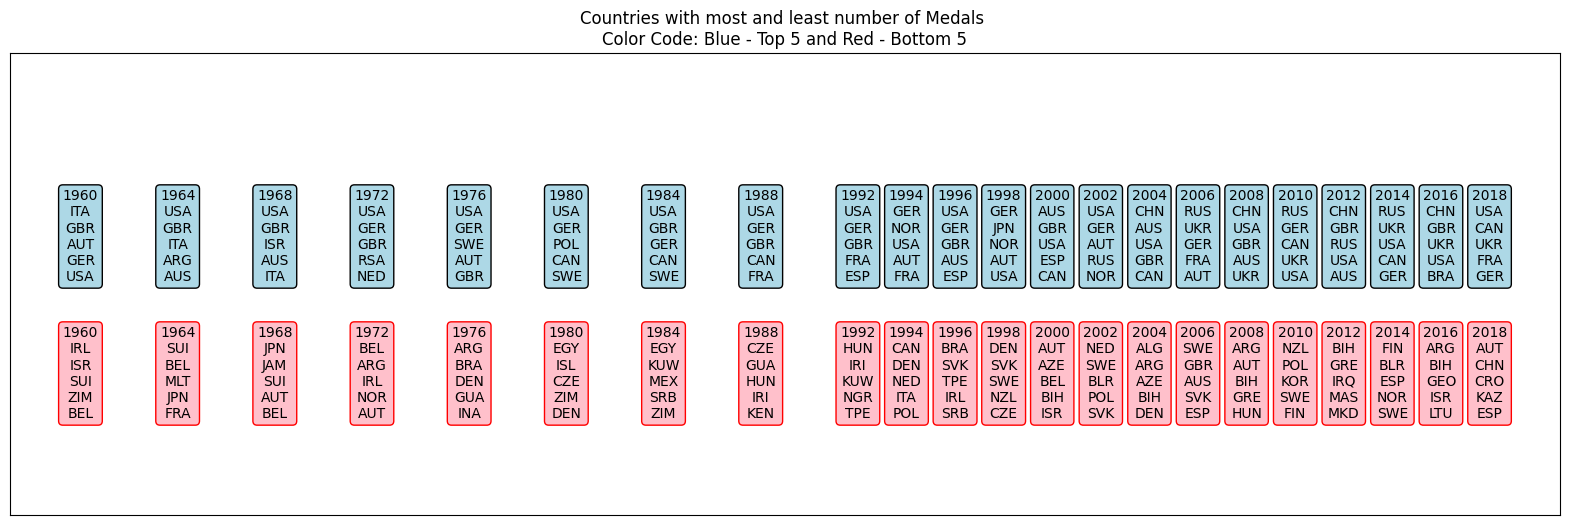

In [52]:
# Prepare the data for plotting
unique_years = list(grouped_texts.keys())
sizes = [
    len(grouped_texts[year]) * 100 for year in unique_years
]  # Size based on number of texts

# Create figure and axis
fig, ax = plt.subplots(figsize = (20,6))

# Create bubbles
scatter = ax.scatter(unique_years, [1] * len(unique_years), s=sizes, alpha=0.5, color = "white")

# Annotate bubbles with grouped texts
for i, year in enumerate(unique_years):
    text0 = f"{year}\n" + "\n".join(grouped_texts[year])
    ax.annotate(
        text0,
        (year, 1),
        ha="center",
        va="bottom",
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightblue"),
    )

    text1 = f"{year}\n" + "\n".join(grouped_texts_bottom[year])
    ax.annotate(
        text1,
        (year, 0.99),
        ha="center",
        va="top",
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="pink"),
    )

# Customize the plot
ax.set_xlabel("")
ax.set_xticks([])
ax.set_yticks([])  # Hide y-axis
ax.set_title("Countries with most and least number of Medals \nColor Code: Blue - Top 5 and Red - Bottom 5")

plt.show()

* No African or South American Country have been in the Top 5 of any paralympic events except for South Africa in 1972 in number 4 and Brazil in 2016 in number 5
* South American and African countries appear in the botton 5 countries. Countries such as Egypt, Kenya and Zimbabwe from Africa and Argentina and Brazil from South America.
* Some of European and Asian countries also appear in the bottom 5. Of note are Italy, Austria and China who once or more appeared in the top 5.

## Paralympic Events Hosting Locations

In [53]:
country_year = hosting_times(medal_standing_data, "games_country")
city_year = hosting_times(medal_standing_data, "games_city")
continent_year = hosting_times(medal_standing_data, "games_continent")

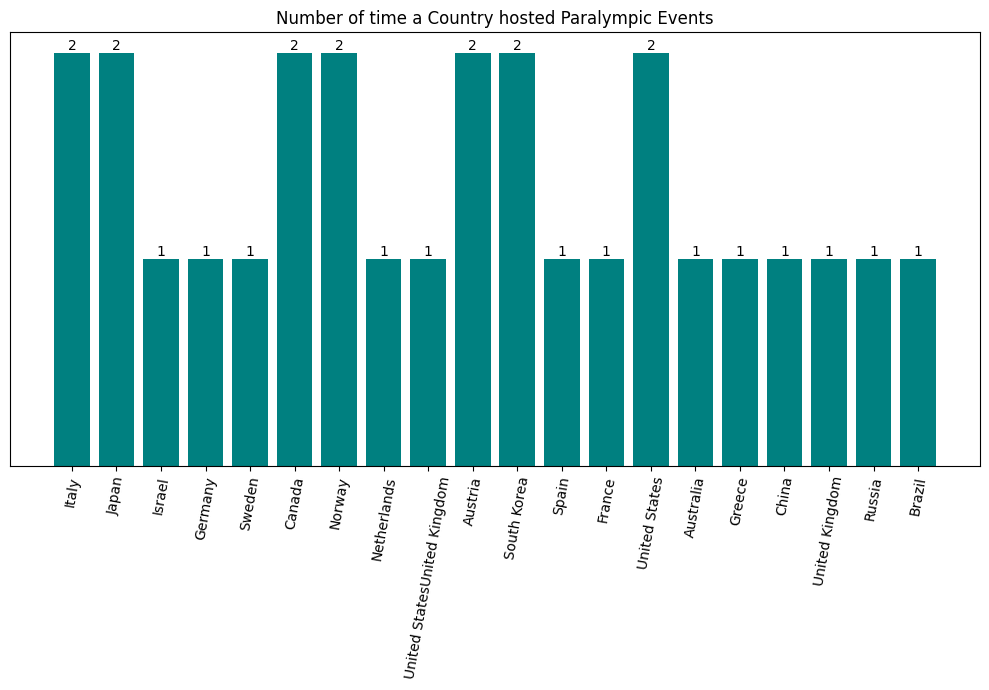

In [54]:
hosting_times_bar(country_year, "Country")

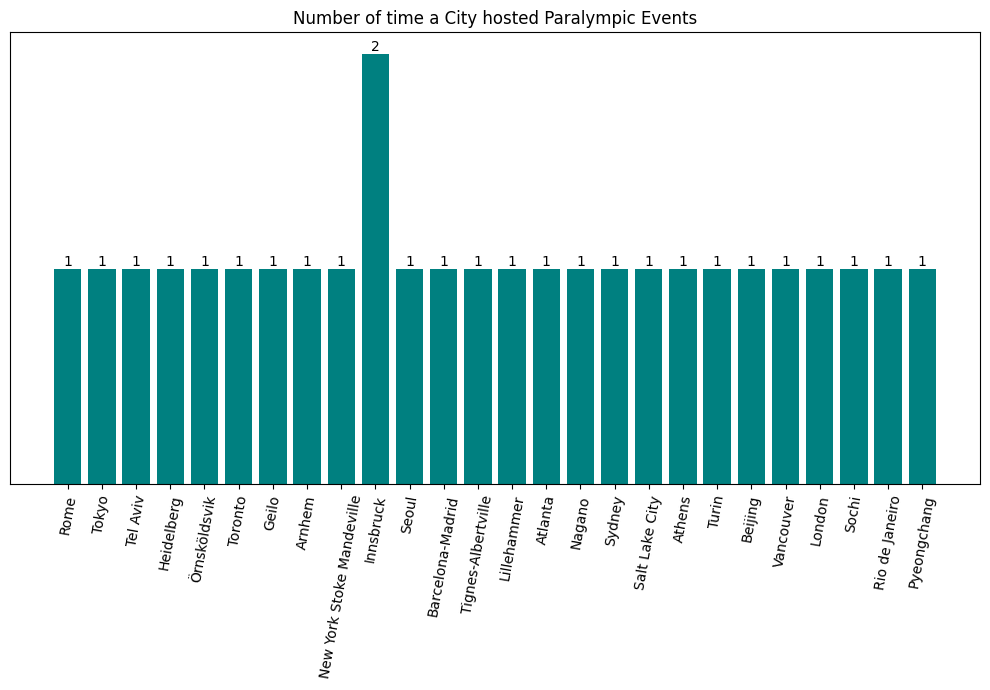

In [55]:
hosting_times_bar(city_year, "City")

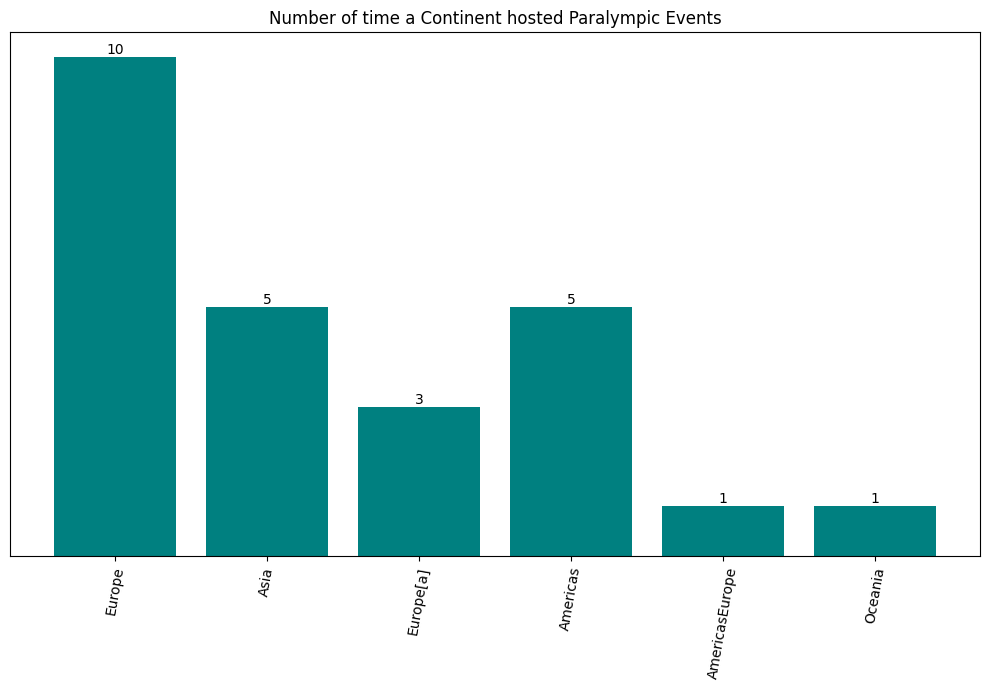

In [56]:
hosting_times_bar(continent_year, "Continent")

* All the events have been hosted this in the northern hermisphere and mostly in Europe. The only exception was when the events were held in Australia and Brazil.
* The hosting nations are from Europe, Asia and America with Europe dominated with 13 occassions where they played host to this events.
* The hosting countries/cities have great financial status.
* Only 1 city have hosted the events twice which is innsbruck in Austria.
* Of note, is that none of African countries have hosted the events even tho they have participated.

## Impact of Hosting on Medals won

In [57]:
def compare_hosting(country):
    country_avg = medal_standing_data[medal_standing_data["npc_name"] == country][["npc_gold", "npc_silver", "npc_bronze"]].mean().values

    hosting = medal_standing_data[
        (medal_standing_data["games_country"] == country)
        & (medal_standing_data["npc_name"] == country)
    ][["npc_gold", "npc_silver", "npc_bronze"]].mean().values

    not_hosting = medal_standing_data[
        ~(medal_standing_data["games_country"] == country)
        & (medal_standing_data["npc_name"] == country)
    ][["npc_gold", "npc_silver", "npc_bronze"]].mean().values

    # unravelling the list
    all_gold_avg = country_avg[0]
    all_silver_avg = country_avg[1]
    all_bronze_avg = country_avg[2]

    hosting_gold_avg = hosting[0]
    hosting_silver_avg = hosting[1]
    hosting_bronze_avg = hosting[2]

    not_hosting_gold_avg = not_hosting[0]
    not_hosting_silver_avg = not_hosting[1]
    not_hosting_bronze_avg = not_hosting[2]

    country = [country]*3
    gold = [all_gold_avg, hosting_gold_avg, not_hosting_gold_avg]
    silver = [all_silver_avg, hosting_silver_avg, not_hosting_silver_avg]
    bronze = [all_bronze_avg, hosting_bronze_avg, not_hosting_bronze_avg]
    host = ["all", "host", "not host"]

    df = pd.DataFrame({"country": country,
                       "gold": gold,
                       "silver": silver,
                       "bronze": bronze,
                       "hosting": host})

    return df

In [58]:
compare_hosting("Italy")

,country,gold,silver,bronze,hosting
0,Italy,2.80000,2.600000,2.928571,all
1,Italy,7.75000,7.500000,6.750000,host
2,Italy,2.16129,1.967742,2.435484,not host


In [59]:
hosting_countries = medal_standing_data["games_country"].unique()

all_df_list = []

for country in hosting_countries:
    if country != "United StatesUnited Kingdom":
        df = compare_hosting(country=country)
        all_df_list.append(df)

all_df_list = pd.concat(all_df_list, ignore_index=True)
all_df_list

,country,gold,silver,bronze,hosting
0,Italy,2.800000,2.600000,2.928571,all
1,Italy,7.750000,7.500000,6.750000,host
2,Italy,2.161290,1.967742,2.435484,not host
3,Japan,2.317460,2.142857,2.365079,all
4,Japan,3.125000,4.375000,3.500000,host
5,Japan,2.200000,1.818182,2.200000,not host
6,Israel,3.211538,2.250000,2.538462,all
7,Israel,6.000000,7.000000,7.666667,host
8,Israel,2.847826,1.630435,1.869565,not host
9,Germany,7.434524,7.011905,6.404762,all


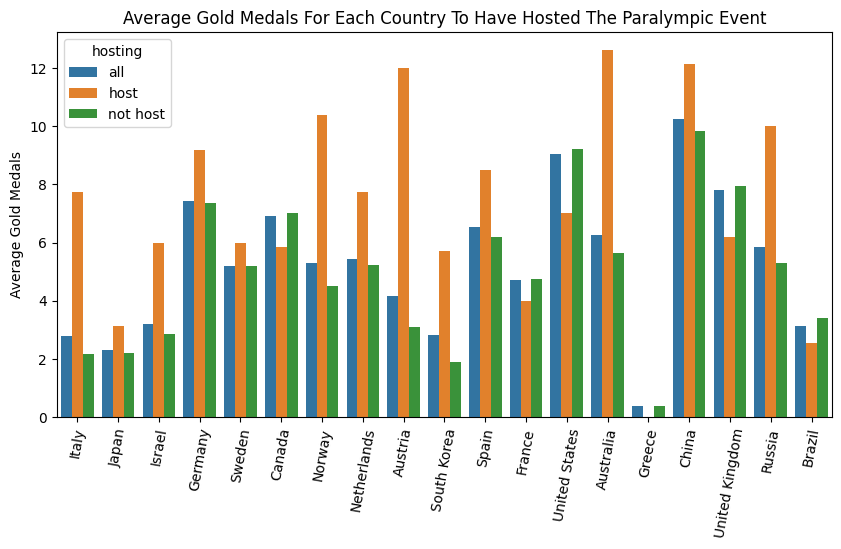

In [67]:
plt.figure(figsize=(10,5))
sns.barplot(all_df_list, x = "country", y = "gold", errorbar=None, hue = "hosting")
plt.title("Average Gold Medals For Each Country To Have Hosted The Paralympic Event")
plt.xlabel("")
plt.ylabel("Average Gold Medals")
plt.xticks(rotation=80)
plt.show()

* On Average, countries have more Gold medals when hosting paralympic events than when not hosting. There is exception, tho, for Canada, France, USA, UK and Brazil. Canada, UK and USA have hosted the events twice or more. 
* This means hosting an event increases the chances of a country winning more gold medals

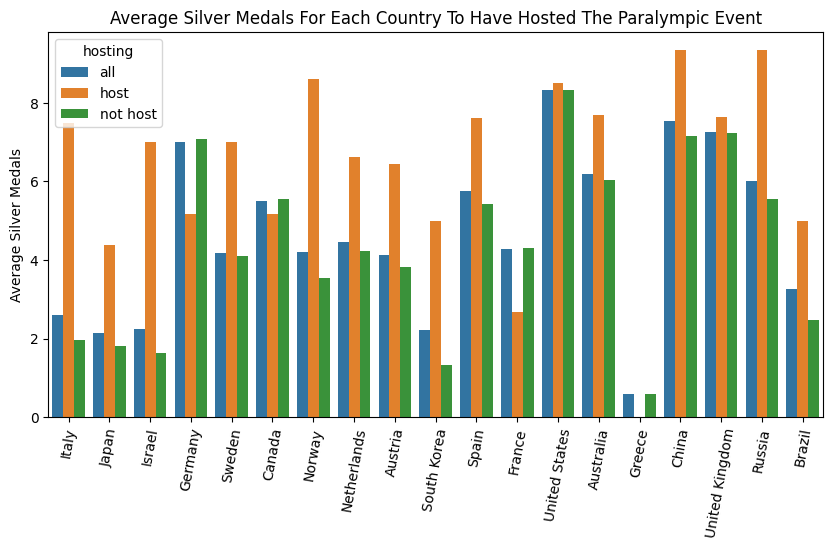

In [69]:
plt.figure(figsize=(10, 5))
sns.barplot(all_df_list, x="country", y="silver", errorbar=None, hue="hosting")
plt.title("Average Silver Medals For Each Country To Have Hosted The Paralympic Event")
plt.xlabel("")
plt.ylabel("Average Silver Medals")
plt.xticks(rotation=80)
plt.show()

* On Average, countries have more Silver medals when hosting paralympic events than when not hosting. There is exception, tho, for Germany, Canada and France. Canada have hosted the events twice while Germany and France have hosted once. 
* This means hosting an event increases the chances of a country winning more silver medals

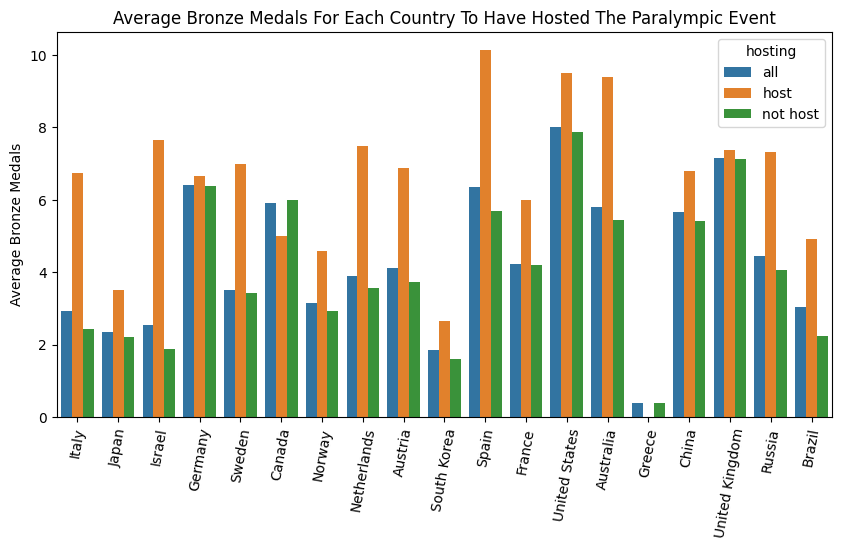

In [68]:
plt.figure(figsize=(10, 5))
sns.barplot(all_df_list, x="country", y="bronze", errorbar=None, hue="hosting")
plt.title("Average Bronze Medals For Each Country To Have Hosted The Paralympic Event")
plt.xlabel("")
plt.ylabel("Average Bronze Medals")
plt.xticks(rotation=80)
plt.show()

* On Average, countries have more bronze medals when hosting paralympic events than when not hosting.
* This means hosting an event increases the chances of a country winning more bronze medals

**Overall Summary:**

* All the countries have won at least one medal when hosting a paralympic event except for Greece which hosted once in 2004
* If a country want to win more medals, they must host the event(s). **Note: There have been complaints in the news of countries complaining about heavy economic stress of hosting olympics and paralympics events due to lack of financial support from The International Olympics Committee. Link: https://gjia.georgetown.edu/2021/04/19/why-cities-no-longer-clamor-to-host-the-olympic-games/ and https://theconversation.com/fewer-cities-can-afford-to-host-the-olympics-but-paris-2024-may-be-clever-enough-to-turn-a-profit-235480
* All countries to have ever hosted the events have more bronze medals compared to when they were not hosting.
* While the chances of winning more silver and gold medals is high when hosting the events. There are some countries which have seen the opposite. Countries such as Canada and France have not reaped rewards of hosting events.

## Sport with Most Medals

In [60]:
medals_per_sport =  medal_standing_data.groupby(["sport_code","sport"]).agg({
"npc_gold": lambda x: x.sum(),
"npc_silver": lambda x: x.sum(),
"npc_bronze": lambda x: x.sum()
}).reset_index()

medals_per_sport["total_medals"] = medals_per_sport["npc_gold"]+medals_per_sport["npc_silver"]+medals_per_sport["npc_bronze"]
medals_per_sport = medals_per_sport.sort_values(ascending=False, by="total_medals")
medals_per_sport

,sport_code,sport,npc_gold,npc_silver,npc_bronze,total_medals
2,AT,Athletics,1971,1680,1540,5191
24,SW,Swimming,1910,1614,1452,4976
1,AS,Alpine Skiing,475,429,382,1286
26,TT,Table Tennis,375,287,317,979
7,CC,Cross-Country,349,320,306,975
8,CY,Cycling,225,195,178,598
30,WF,Wheelchair Fencing,186,183,180,549
0,AR,Archery,158,134,116,408
21,SH,Shooting,156,125,105,386
17,PO,Powerlifting,135,112,97,344


* Athletics, Swimming and Alpine Skiing are the most popular sports. They have the most number of medals
* Basketball only have two medals
* Individual sports are have more medals compared to team sports. Perhaps due to the nature that team sports take longer compared to individual sports